In [2]:
# import data using pandas and create an instance of pandas.DataFrame
import pandas as pd

In [3]:
# get the path of your dataset file, relative to your notebook_path; ex: 'participants/participants.csv'
dataset_file_path = '/Users/mmorosac/workspaces/personal/SupergirlsInTech/participants/participants.csv'

# read the csv file ; no extra arguments required
df = pd.read_csv(dataset_file_path)

# check the type of df
type(df) 

pandas.core.frame.DataFrame

In [4]:
# use .head() and .tail() to get a glimpse of what the file looks like
# obs: pd.read_csv crated an index column
df.head() # returns first 5 entries

,Status,Attending,Current studies status,How often did you have to make decisions based on data in the past year?,What are the most common sources for the data you are working with?,current preferred method for data visualization,How familiar are you with the following technologies (1 - never heard of it; 5 - I have working experience) [Python Language],How familiar are you with the following technologies (1 - never heard of it; 5 - I have working experience) [Pandas],How familiar are you with the following technologies (1 - never heard of it; 5 - I have working experience) [Matplotlib]
0,fit,yes,Master student,Never,SQL,Online tools,4,1,1
1,fit,no,Graduated,More than a couple of times,Web;SQL,Online tools,2,2,1
2,fit,yes,Master student,A couple of times,SQL;Excel,Excel,5,2,2
3,fit,yes,Master student,More than a couple of times,Web;SQL;SAS,Python library;R library,4,3,3
4,fit,NaN,Graduated,A couple of times,Web;SQL,Excel,3,1,2


In [5]:
df.tail() # returns the last 5 entries

,Status,Attending,Current studies status,How often did you have to make decisions based on data in the past year?,What are the most common sources for the data you are working with?,current preferred method for data visualization,How familiar are you with the following technologies (1 - never heard of it; 5 - I have working experience) [Python Language],How familiar are you with the following technologies (1 - never heard of it; 5 - I have working experience) [Pandas],How familiar are you with the following technologies (1 - never heard of it; 5 - I have working experience) [Matplotlib]
43,over,no,Undergrad student,A couple of times,SQL;Excel,Python library;Matlab,5,4,4
44,over,no,Graduated,A couple of times,Web;SQL;Excel,Online tools;Excel;R library,4,3,4
45,below,no,Graduated,More than a couple of times,Web;SQL,Online tools;R library,1,1,2
46,below,no,Undergrad student,Once,Web;SQL;Excel,Online tools;Excel,1,1,3
47,below,no,Undergrad student,Never,Excel,Online tools,1,1,1


In [6]:
# we can see that the column labels (header) are somehow confusing; 
# we can use another header, from '/participants/participants-header-aliases.txt'
alias_header_file_path = '/Users/mmorosac/workspaces/personal/SupergirlsInTech/participants/participants-header-aliases.txt' 

# read the alias header
alias_header = open(alias_header_file_path, 'r').readline().split(',')

# set the new header
df.columns = alias_header

In [7]:
# lets look into the set of values using .info()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 9 columns):
status                 48 non-null object
attending              41 non-null object
studies                48 non-null object
decisions frequency    48 non-null object
data sources           48 non-null object
viz. method            48 non-null object
python                 48 non-null int64
pandas                 48 non-null int64
matplotlib             48 non-null int64
dtypes: int64(3), object(6)
memory usage: 3.5+ KB


In [8]:
# we can see that the 'attending' column contains null values
# let's replace the null values for the 'attending' column with the 'unknown' value
df['attending'] = df['attending'].fillna('unknown')

# display
df['attending']

0         yes
1          no
2         yes
3         yes
4     unknown
5     unknown
6         yes
7          no
8          no
9         yes
10        yes
11        yes
12        yes
13        yes
14        yes
15        yes
16        yes
17        yes
18        yes
19        yes
20    unknown
21        yes
22        yes
23        yes
24    unknown
25        yes
26        yes
27        yes
28        yes
29    unknown
30        yes
31        yes
32        yes
33    unknown
34        yes
35        yes
36    unknown
37        yes
38        yes
39        yes
40         no
41         no
42         no
43         no
44         no
45         no
46         no
47         no
Name: attending, dtype: object

In [9]:
# the studies column won't be necessary to us; let's delete it
del df['studies']

# display
print(df.columns)

Index(['status', 'attending', 'decisions frequency', 'data sources',
       'viz. method', 'python', 'pandas', 'matplotlib'],
      dtype='object')


In [10]:
# the 'decisions frequency' column contains values that are too explicit; let's replace them
frequency_aliases = {
    'More than a couple of times': 'Frequently', 
    'A couple of times': 'Sometimes',
    'Never': 'Never',
    'Once': 'Once'
}
df['decisions frequency'] = df['decisions frequency'].map(frequency_aliases)

# display
df['decisions frequency']

0          Never
1     Frequently
2      Sometimes
3     Frequently
4      Sometimes
5     Frequently
6     Frequently
7      Sometimes
8     Frequently
9      Sometimes
10     Sometimes
11         Never
12     Sometimes
13     Sometimes
14    Frequently
15         Never
16     Sometimes
17     Sometimes
18          Once
19     Sometimes
20    Frequently
21     Sometimes
22     Sometimes
23          Once
24    Frequently
25     Sometimes
26     Sometimes
27     Sometimes
28    Frequently
29     Sometimes
30     Sometimes
31     Sometimes
32    Frequently
33     Sometimes
34    Frequently
35     Sometimes
36     Sometimes
37         Never
38     Sometimes
39     Sometimes
40    Frequently
41          Once
42     Sometimes
43     Sometimes
44     Sometimes
45    Frequently
46          Once
47         Never
Name: decisions frequency, dtype: object

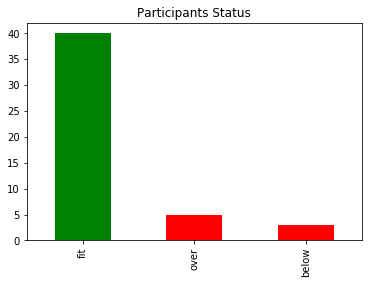

In [12]:
# display the status of participants 
df['status'].value_counts().plot(kind='bar', color=['g', 'r', 'r'], title='Participants Status')


In [15]:
# extract those participants that have been selected
df_fit = df[df['status'] == 'fit']

# display
df_fit

,status,attending,decisions frequency,data sources,viz. method,python,pandas,matplotlib
0,fit,yes,Never,SQL,Online tools,4,1,1
1,fit,no,Frequently,Web;SQL,Online tools,2,2,1
2,fit,yes,Sometimes,SQL;Excel,Excel,5,2,2
3,fit,yes,Frequently,Web;SQL;SAS,Python library;R library,4,3,3
4,fit,unknown,Sometimes,Web;SQL,Excel,3,1,2
5,fit,unknown,Frequently,Web;SQL,Online tools;Excel,3,1,1
6,fit,yes,Frequently,Web;SQL;Excel;Other,Online tools;Excel;Python library;Matlab,5,3,3
7,fit,no,Sometimes,Excel,Excel,3,1,1
8,fit,no,Frequently,Web;SAS;Excel,Online tools;Excel;R library,3,3,1
9,fit,yes,Sometimes,Web;Excel,Online tools;Excel;Python library;R library,4,3,3


In [16]:
# delete the status column
del df_fit['status']

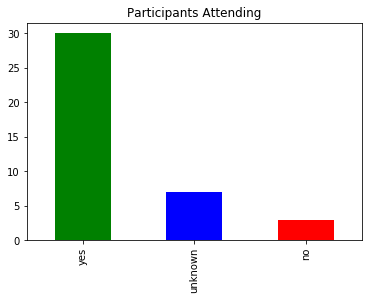

In [20]:
# display the attendance
df_fit['attending'].value_counts().plot(kind='bar', color=['g', 'b', 'r'], title='Participants Attending')



In [59]:
# gather data-driven decisions frequency
data_decisions = {}
for ind, frequency in df_fit['decisions frequency'].iteritems():
    if frequency not in data_decisions.keys():
        data_decisions[frequency] = 1
    else:
        data_decisions[frequency] += 1


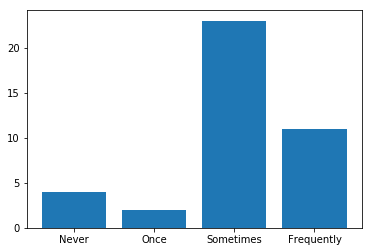

In [71]:
# construct DataFrame from frequencies
import matplotlib.pyplot as plt

frequency_types = ['Never', 'Once', 'Sometimes', 'Frequently']
frequency_values = [data_decisions[type] for type in frequency_types]

plt.bar(range(len(frequency_types)), frequency_values)
plt.xticks(range(len(frequency_types)), frequency_types)
plt.show()

In [26]:
# gather data sources frequency
data_sources = {}
for ind, sources in df_fit['data sources'].iteritems():
    for source in sources.split(';'):
        if source not in data_sources.keys():
            data_sources[source] = 1
        else:
            data_sources[source] += 1

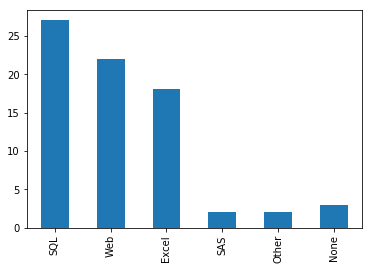

In [56]:
# construct DataFrame from frequencies
df_sources = pd.DataFrame.from_dict(data_sources, orient='index').plot(kind='bar', legend=False)

# SQL (via DB visual tools) and Excel can export to CSV in order to create a DataFrame
# Web (most likely JSON format) can be used as an argument to pd.DataFrame()

In [76]:
df_fit.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40 entries, 0 to 39
Data columns (total 7 columns):
attending              40 non-null object
decisions frequency    40 non-null object
data sources           40 non-null object
viz. method            40 non-null object
python                 40 non-null int64
pandas                 40 non-null int64
matplotlib             40 non-null int64
dtypes: int64(3), object(4)
memory usage: 3.8+ KB


In [84]:
skills = ['python', 'pandas', 'matplotlib']
df_fit[skills].describe()

,python,pandas,matplotlib
count,40.000000,40.000000,40.000000
mean,3.325000,1.450000,1.600000
std,0.944281,0.714322,0.810191
min,2.000000,1.000000,1.000000
25%,3.000000,1.000000,1.000000
50%,3.000000,1.000000,1.000000
75%,4.000000,2.000000,2.000000
max,5.000000,3.000000,4.000000


In [91]:
df_fit[df_fit['python'] == 2]

,attending,decisions frequency,data sources,viz. method,python,pandas,matplotlib
1,no,Frequently,Web;SQL,Online tools,2,2,1
11,yes,Never,None,Online tools;R library,2,1,3
12,yes,Sometimes,Web;SQL;Excel,Matlab,2,1,4
13,yes,Sometimes,SQL;Excel,Online tools;Excel,2,1,1
15,yes,Never,None,Online tools;Excel,2,1,1
16,yes,Sometimes,Web;SQL,Online tools,2,1,1
19,yes,Sometimes,Web,Excel,2,1,1
22,yes,Sometimes,Web,Online tools,2,1,1


In [114]:
# sort by python skill
df_fit = df_fit.sort_values('python', axis=0, ascending=True)

# display
df_fit

# notice the indexes are now mixed; we have to update the index column
df_fit.index = [i for i in range(len(df_fit))]

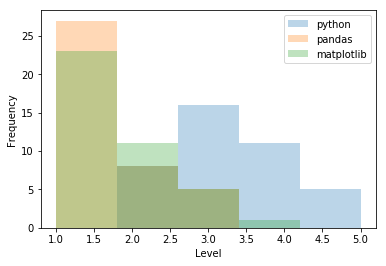

In [133]:
# hist plot skills
df_fit[['python', 'pandas', 'matplotlib']].plot(kind='hist', bins=5, range=(1,5), alpha=0.3)
plt.xlabel('Level')
plt.show()

In [126]:
# check the correlation between skills
df_fit[['python', 'pandas', 'matplotlib']].corr()

,python,pandas,matplotlib
python,1.000000,0.385839,0.241312
pandas,0.385839,1.000000,0.451912
matplotlib,0.241312,0.451912,1.000000
